
### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('car-data.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15000 non-null  int64  
 1   make          14724 non-null  object 
 2   model         14721 non-null  object 
 3   trim          14713 non-null  object 
 4   body          14657 non-null  object 
 5   transmission  13251 non-null  object 
 6   state         15000 non-null  object 
 7   condition     14668 non-null  object 
 8   odometer      14995 non-null  float64
 9   color         14974 non-null  object 
 10  interior      14974 non-null  object 
 11  mmr           15000 non-null  object 
 12  sellingprice  15000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

# Question 1. Determine the number of missing values in each column.

In [261]:
na_df=df.isna().sum()



In [88]:
import plotly.io as pio
import plotly.express as px
pio.renderers
#Setting the default plot display as image

pio.renderers.default = "png"

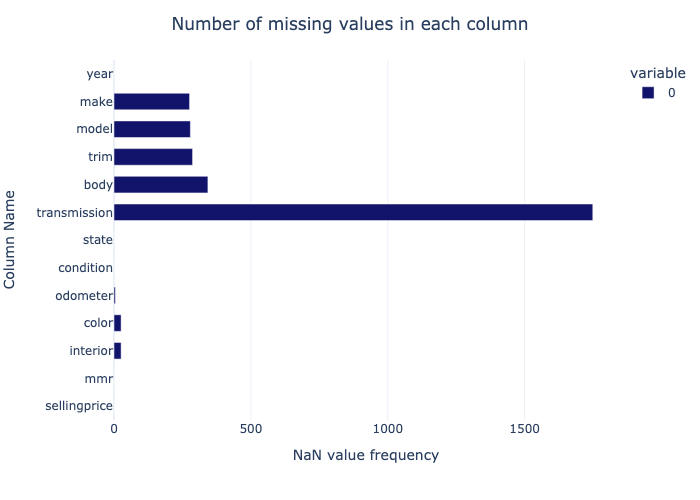

In [262]:
# visualizing the graph of missing values in each column

fig = px.bar(na_df, orientation='h',template="plotly_white")
fig.update_layout(yaxis=dict(autorange="reversed"), 
                  title={'text' :'Number of missing values in each column','x':0.5,'xanchor': 'center'},
                 xaxis_title=" NaN value frequency",
                 yaxis_title="Column Name")
fig.update_traces(marker_color='#12136b',width=0.6)
fig.show()

From the graph we can see the transmission column has the highest number of missing values compared to make, model, trim, body and condition. Also year, mmr and sellingprice don't have any missing values.

# Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [90]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2014,Nissan,Versa,1.6 SV,Sedan,automatic,ca,4.8,80.0,—,black,9975,11250
1,2008,BMW,5 Series,550i,Sedan,automatic,az,3.7,99529.0,silver,black,13550,13600
2,2013,Toyota,Corolla,S Special Edition,Sedan,automatic,ca,3.5,19377.0,gray,gray,11850,12400
3,2012,Mercedes-Benz,C-Class,C250 Sport,sedan,automatic,nv,3.6,41143.0,—,black,18600,18000
4,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,ca,3.9,29560.0,gray,black,21000,21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2004,Dodge,Dakota,SLT,Quad Cab,automatic,in,3.6,70360.0,burgundy,gray,7750,9100
14996,2006,Chevrolet,Impala,LS,Sedan,automatic,tx,2.9,167314.0,white,beige,2325,2900
14997,2014,Subaru,XV Crosstrek,Limited,suv,automatic,nj,3.8,16915.0,orange,black,21000,23800
14998,2008,Hyundai,Santa Fe,Limited,SUV,automatic,ca,3.2,112031.0,black,black,7250,7200


In [91]:
# code
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition        object
odometer        float64
color            object
interior         object
mmr              object
sellingprice      int64
dtype: object

In [92]:
df.condition.value_counts(dropna= False)

1.9    1120
3.7     715
3.5     710
4.4     692
4.2     688
4.3     631
3.6     629
4.1     615
2       564
4       557
3.9     557
2.8     521
3.8     511
2.9     504
3.4     453
2.7     428
4.9     387
4.6     363
4.8     357
2.5     351
NaN     332
4.5     323
4.7     301
2.6     290
3.3     286
5       278
3       274
2.1     252
3.2     251
2.4     239
3.1     227
1       196
2.3     193
2.2     170
1.1       6
1.3       5
1.6       5
1.5       4
1.7       4
1.8       4
1.4       4
1.2       2
ms        1
Name: condition, dtype: int64

In [265]:
#converting all values into numeric
df['condition'] = df.condition.apply(pd.to_numeric, args=('coerce',))

In [266]:
#checking the value counts
df.condition.value_counts(dropna= False)

1.9    1120
3.7     715
3.5     710
4.4     692
4.2     688
4.3     631
3.6     629
4.1     615
2.0     564
4.0     557
3.9     557
2.8     521
3.8     511
2.9     504
3.4     453
2.7     428
4.9     387
4.6     363
4.8     357
2.5     351
0.0     333
4.5     323
4.7     301
2.6     290
3.3     286
5.0     278
3.0     274
2.1     252
3.2     251
2.4     239
3.1     227
1.0     196
2.3     193
2.2     170
1.1       6
1.3       5
1.6       5
1.5       4
1.7       4
1.8       4
1.4       4
1.2       2
Name: condition, dtype: int64

In [267]:
df['condition']= df.condition.fillna(0.0).astype(float)

In [268]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
mmr               int64
sellingprice      int64
dtype: object

In [99]:
df['mmr'].unique()

array(['9975', '13550', '11850', '18600', '21000', '14050', '375',
       '22500', '6450', '21400', '18150', '25700', '15500', '3800',
       '14500', '23200', '19600', '20600', '6350', '13850', '24500',
       '8625', '8200', '9075', '8850', '12500', '7125', '20300', '8600',
       '15950', '8175', '13950', '18850', '8125', '8975', '12950',
       '14100', '12250', '11000', '4000', '20700', '15100', '7900',
       '1600', '16700', '1150', '19400', '7600', '26300', '33700', '8275',
       '24600', '3450', '9750', '5075', '17550', '23000', '10800',
       '33400', '11600', '13150', '9200', '13400', '3875', '4950', '5875',
       '24700', '4100', '17450', '26600', '16850', '4800', '4625',
       '19900', '15300', '8450', '9775', '18200', '22600', '14250',
       '2675', '12550', '22200', '5600', '13050', '16150', '4850', '4650',
       '11400', '13500', '15450', '8150', '19750', '2700', '6400',
       '14850', '9500', '29400', '16950', '11650', '18700', '6925',
       '23700', '10450', '

In [270]:
df['mmr'] = df.mmr.apply(pd.to_numeric, args=('coerce',))

In [271]:
#df.mmr = df.mmr.infer_objects() 
df['mmr']= df.mmr.fillna(0).astype(int)


In [272]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
mmr               int64
sellingprice      int64
dtype: object

condition and mmr columns have incorrect data types as it contains some incorrect character values. Those values are converted into NaN with to_numeric() and then NaN are filled with appropriate values and converted into correct data types.

# Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [103]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'dodge',
 'dodge',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mazda',
 'mercedes',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'pontiac',
 'pontiac',
 'porsche',
 'ram',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'subaru',
 'suzuki',
 'toyota',
 'volkswagen',
 'volvo']

Output shows that make column contains repeated values which are written in different format.

In [273]:
df.make.describe(include='string')

count     14724
unique       66
top        Ford
freq       2539
Name: make, dtype: object

In [274]:
make_df= df.copy()

In [106]:
make_df['make']=make_df["make"].str.lower() 

In [107]:
make_df.make.value_counts()

ford             2548
chevrolet        1619
nissan           1490
toyota           1071
dodge             855
honda             706
hyundai           582
bmw               546
mercedes-benz     493
kia               476
chrysler          455
jeep              428
infiniti          413
volkswagen        329
lexus             306
gmc               305
mazda             211
cadillac          191
lincoln           160
acura             154
subaru            137
buick             132
audi              129
pontiac           119
ram               114
mitsubishi        106
mini              104
volvo             102
saturn             73
scion              61
mercury            52
land rover         47
porsche            44
jaguar             39
suzuki             27
hummer             24
fiat               22
saab               16
oldsmobile         11
smart              11
isuzu               4
mercedes            3
landrover           2
maserati            2
aston martin        1
fisker    

In [81]:
#make_df['make'] = make_df['make'].map({'mercedes-benz':'mercedes', 'chev truck':'chevrolet', 'gmc truck':'gmc'})

I tried to use map() function. In the output it was changing all the values except mentioned in the brackets all into NaN so I changet it to replace()

In [109]:
replace_values = {'mercedes-benz':'mercedes', 'chev truck':'chevrolet', 'gmc truck':'gmc' }                                                                                          

make_df = make_df.replace({"make": replace_values}) 

In [117]:
make_val=make_df.make.value_counts()
make_val

ford            2548
chevrolet       1620
nissan          1490
toyota          1071
dodge            855
honda            706
hyundai          582
bmw              546
mercedes         496
kia              476
chrysler         455
jeep             428
infiniti         413
volkswagen       329
gmc              306
lexus            306
mazda            211
cadillac         191
lincoln          160
acura            154
subaru           137
buick            132
audi             129
pontiac          119
ram              114
mitsubishi       106
mini             104
volvo            102
saturn            73
scion             61
mercury           52
land rover        47
porsche           44
jaguar            39
suzuki            27
hummer            24
fiat              22
saab              16
oldsmobile        11
smart             11
isuzu              4
landrover          2
maserati           2
aston martin       1
fisker             1
bentley            1
Name: make, dtype: int64

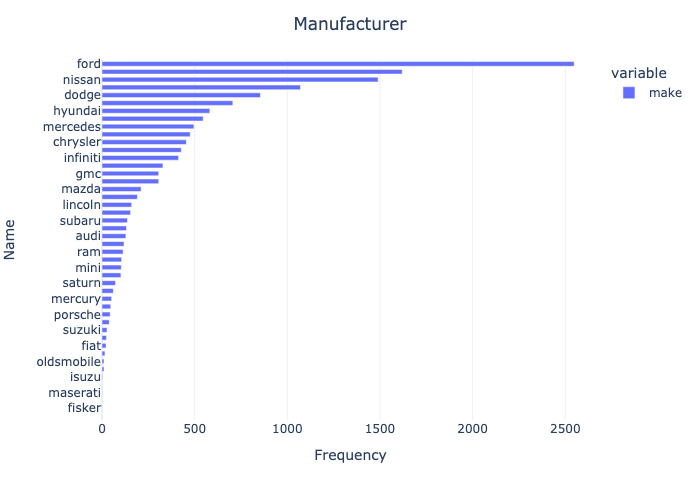

In [116]:
fig = px.bar(make_val , orientation='h',template="plotly_white")
fig.update_layout(yaxis=dict(autorange="reversed"), 
                  title={'text' :'Manufacturer','x':0.5,'xanchor': 'center'},
                 xaxis_title="Frequency",
                 yaxis_title="Name")
fig.update_traces(width=0.6)
fig.show()

Graph shows most frequent manufacturer is ford and least frequent is fisker.

# Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

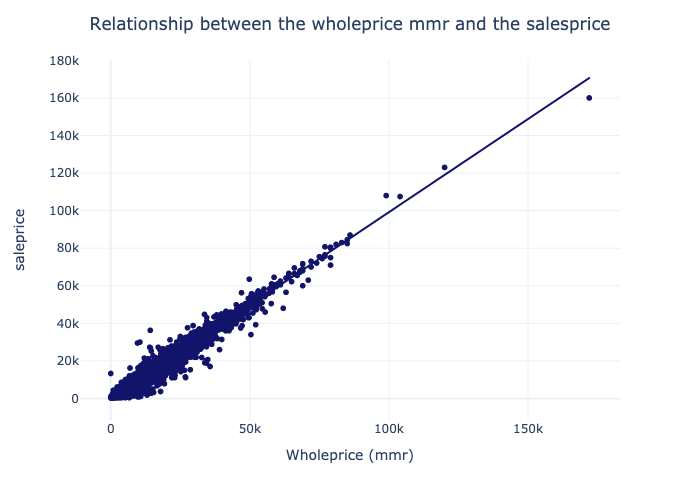

In [34]:
# code
fig = px.scatter(df, x="mmr", y="sellingprice", trendline="ols",template="plotly_white")

fig.update_layout(
                  title={'text' :'Relationship between the wholeprice mmr and the salesprice','x':0.5,'xanchor': 'center'},
                 xaxis_title=" Wholeprice (mmr)",
                 yaxis_title="saleprice")
fig.update_traces(marker_color='#12136b')
fig.show()

Overall correlation is linear regression.

In [ ]:
from sklearn.metrics import r2_score

In [288]:
i=10000
r2_list=[]
while i<160000:   
    df1 = make_df[make_df['sellingprice'].between(0,i)]
    r2=r2_score(df1['mmr'], df1['sellingprice'])
    r2_list.append(r2)
    i+=10000
    
r2_list    

[0.7624831017589128,
 0.9201761204210454,
 0.9492532151795802,
 0.9583327777974693,
 0.9634103543972291,
 0.9656099963969977,
 0.9667881607585174,
 0.9677576642162552,
 0.9685257647768191,
 0.9685257647768191,
 0.9688123837756529,
 0.9688123837756529,
 0.9690611772886241,
 0.9690611772886241,
 0.9690611772886241]

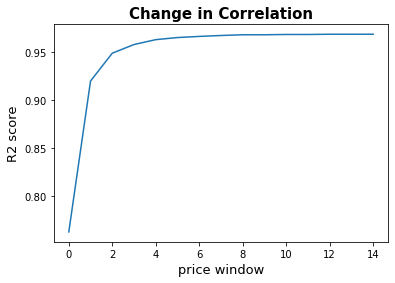

In [292]:
plt.plot(r2_list)
plt.title("Change in Correlation",fontweight="bold",fontsize=15)
plt.xlabel('price window',fontsize=13)
plt.ylabel('R2 score',fontsize=13)
plt.show()


As we increase the maximum selling price window correlation between sales price and wholeprice

# Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [175]:
# code
make_df.make.value_counts()[:10]

ford         2548
chevrolet    1620
nissan       1490
toyota       1071
dodge         855
honda         706
hyundai       582
bmw           546
mercedes      496
kia           476
Name: make, dtype: int64

In [176]:
sale_vary_df = make_df[make_df['year'].between(2010, 2015)]

In [177]:
sale_vary_df.year.unique()

array([2014, 2013, 2012, 2015, 2010, 2011])

In [178]:
sale_vary_df.sellingprice.describe()

count      9821.000000
mean      17470.195703
std        9255.681668
min         800.000000
25%       11400.000000
50%       15200.000000
75%       21400.000000
max      160000.000000
Name: sellingprice, dtype: float64

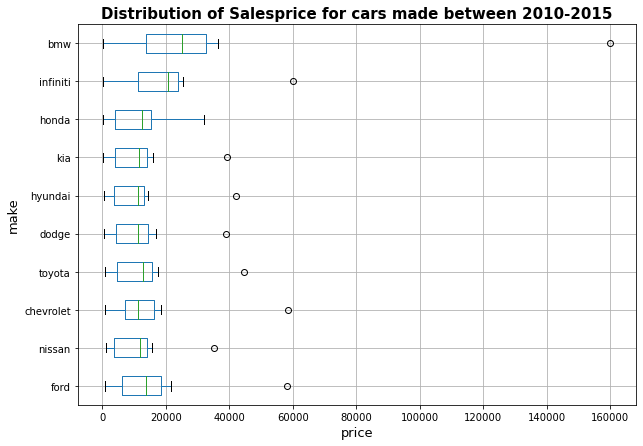

In [257]:
plt.figure(figsize=(10,7))
(sale_vary_df
     .groupby('make')['sellingprice']
     .describe()
     .sort_values('count', ascending=False)
     [:10]
     .T
     .boxplot(vert=False)     
)
plt.title("Distribution of Salesprice for cars made between 2010-2015",fontweight="bold",fontsize=15)
plt.xlabel('price',fontsize=13)
plt.ylabel('make',fontsize=13)
plt.show()

This graph shows the distribution of sales price grouped by make for cars which are made between 2010-2015. Most of the sales price are between 0 to 20000. There are some outliers values for all manufacturer.